In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold

from scikeras.wrappers import KerasClassifier

In [2]:
# Pulling data from UCI ML Repository
dataset_red_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
dataset_white_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data_red = pd.read_csv(dataset_red_url, sep=';')
data_white = pd.read_csv(dataset_white_url, sep=';')

In [3]:
data_red['type'] = np.full((data_red.shape[0],1), 1)
data_white['type'] = np.full((data_white.shape[0],1), 0)

In [4]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.0


In [5]:
data = pd.concat([data_red, data_white])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [6]:
y = data.type
X = data.drop('type', axis=1)

X.shape

(6497, 12)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale the data
scaler = MinMaxScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [9]:
def make_model():
    # Create the neural network framework
    model = keras.Sequential([
        layers.Dense(units=13, activation='relu', input_shape=[12]),
        layers.Dense(units=9, activation='relu'),
        layers.Dense(units=1, activation='sigmoid')
    ])
    
    return model

In [10]:
# Compile base model
model = make_model()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

Metal device set to: Apple M1 Pro


2022-07-29 12:27:51.056238: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-29 12:27:51.056395: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
# Train the model
history = model.fit(
    scaled_X_train, y_train,
    validation_data=(scaled_X_test, y_test),
    batch_size=1,
    epochs=5,
    verbose=1
)

Epoch 1/5


2022-07-29 12:27:52.776757: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-29 12:27:52.960600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5194/5197 [============================>.] - ETA: 0s - loss: 0.1605 - accuracy: 0.9378

2022-07-29 12:28:19.880464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5197/5197 [==============================] - 31s 6ms/step - loss: 0.1604 - accuracy: 0.9378 - val_loss: 0.0774 - val_accuracy: 0.9769
Epoch 2/5
5197/5197 [==============================] - 28s 5ms/step - loss: 0.0469 - accuracy: 0.9852 - val_loss: 0.0821 - val_accuracy: 0.9769
Epoch 3/5
5197/5197 [==============================] - 28s 5ms/step - loss: 0.0390 - accuracy: 0.9886 - val_loss: 0.0612 - val_accuracy: 0.9831
Epoch 4/5
5197/5197 [==============================] - 28s 5ms/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.0543 - val_accuracy: 0.9846
Epoch 5/5
5197/5197 [==============================] - 28s 5ms/step - loss: 0.0311 - accuracy: 0.9919 - val_loss: 0.0578 - val_accuracy: 0.9862


<AxesSubplot:>

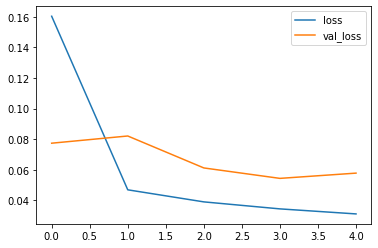

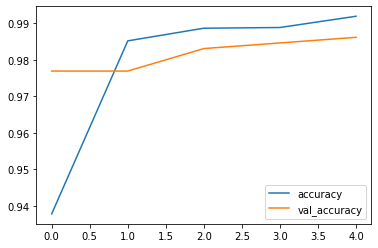

In [12]:
# Plotting loss and accuracy functions
history_df = pd.DataFrame(history.history)

history_df.plot(y=['loss', 'val_loss'])
history_df.plot(y=['accuracy', 'val_accuracy'])

In [14]:
# K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Re-scale the data
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [23]:
# Parameters to tune
grid = {
    'optimizer':['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
    'batch_size':[10, 20]
}

callback = keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True
)

model = KerasClassifier(
    model=make_model, 
    loss='binary_crossentropy', 
    epochs=100, 
    batch_size=10, 
    verbose=2
)

# GridSearchCV for hyperparameter optimization
gscv = GridSearchCV(
    estimator=model, 
    param_grid=grid, 
    cv=kf, 
    verbose=0
)

In [24]:
gscv_out = gscv.fit(X, y)

Epoch 1/100


2022-07-29 14:09:03.516483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 0.3297 - 2s/epoch - 5ms/step
Epoch 2/100
520/520 - 2s - loss: 0.2061 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.2028 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.1999 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.1959 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.1912 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.1902 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.1883 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.1835 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.1871 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.1820 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.1802 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.1809 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.1811 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.1790 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.1769 - 2s/epoch - 4ms/step
Epoch 17/100


2022-07-29 14:12:19.640383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 14:12:19.987869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 0.3851 - 2s/epoch - 4ms/step
Epoch 2/100
520/520 - 2s - loss: 0.2121 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.2061 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.2038 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.2015 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.1973 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.1985 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.1979 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.1935 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.1905 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.1904 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.1883 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.1870 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.1854 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.1845 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.1862 - 2s/epoch - 4ms/step
Epoch 17/100


2022-07-29 14:15:32.440612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 14:15:32.783480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 0.3820 - 2s/epoch - 4ms/step
Epoch 2/100
520/520 - 2s - loss: 0.2196 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.2120 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.2101 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.2080 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.2063 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.2035 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.2003 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.1986 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.2004 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.1962 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.1941 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.1931 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.1907 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.1888 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.1859 - 2s/epoch - 4ms/step
Epoch 17/100


2022-07-29 14:18:43.881176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 217ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 14:18:44.235892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 0.3856 - 2s/epoch - 4ms/step
Epoch 2/100
520/520 - 2s - loss: 0.2148 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.2096 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.2065 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.2003 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.1989 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.1991 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.1944 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.1928 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.1916 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.1912 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.1878 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.1904 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.1834 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.1879 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.1821 - 2s/epoch - 4ms/step
Epoch 17/100


2022-07-29 14:21:56.834627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 224ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 14:21:57.204012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 0.3636 - 2s/epoch - 4ms/step
Epoch 2/100
520/520 - 2s - loss: 0.2194 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.2345 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.2096 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.2064 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.2036 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.1990 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.1953 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.1923 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.1917 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.1905 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.1900 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.1863 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.1872 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.1825 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.1797 - 2s/epoch - 4ms/step
Epoch 17/100


2022-07-29 14:25:10.373266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 219ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 14:25:10.785968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 3s - loss: 1.5632 - 3s/epoch - 6ms/step
Epoch 2/100
520/520 - 3s - loss: 0.2181 - 3s/epoch - 5ms/step
Epoch 3/100
520/520 - 3s - loss: 0.1919 - 3s/epoch - 5ms/step
Epoch 4/100
520/520 - 3s - loss: 0.1666 - 3s/epoch - 5ms/step
Epoch 5/100
520/520 - 3s - loss: 0.1561 - 3s/epoch - 5ms/step
Epoch 6/100
520/520 - 3s - loss: 0.1410 - 3s/epoch - 5ms/step
Epoch 7/100
520/520 - 3s - loss: 0.1307 - 3s/epoch - 5ms/step
Epoch 8/100
520/520 - 3s - loss: 0.1199 - 3s/epoch - 5ms/step
Epoch 9/100
520/520 - 3s - loss: 0.1145 - 3s/epoch - 5ms/step
Epoch 10/100
520/520 - 3s - loss: 0.1108 - 3s/epoch - 5ms/step
Epoch 11/100
520/520 - 3s - loss: 0.1010 - 3s/epoch - 5ms/step
Epoch 12/100
520/520 - 3s - loss: 0.1008 - 3s/epoch - 5ms/step
Epoch 13/100
520/520 - 3s - loss: 0.0966 - 3s/epoch - 5ms/step
Epoch 14/100
520/520 - 3s - loss: 0.0966 - 3s/epoch - 5ms/step
Epoch 15/100
520/520 - 3s - loss: 0.0945 - 3s/epoch - 5ms/step
Epoch 16/100
520/520 - 3s - loss: 0.0891 - 3s/epoch - 5ms/step
Epoch 17/100


2022-07-29 14:29:26.120599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 14:29:26.524689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 3s - loss: 1.5089 - 3s/epoch - 6ms/step
Epoch 2/100
520/520 - 3s - loss: 0.2278 - 3s/epoch - 5ms/step
Epoch 3/100
520/520 - 3s - loss: 0.1907 - 3s/epoch - 5ms/step
Epoch 4/100
520/520 - 3s - loss: 0.1725 - 3s/epoch - 5ms/step
Epoch 5/100
520/520 - 3s - loss: 0.1588 - 3s/epoch - 5ms/step
Epoch 6/100
520/520 - 3s - loss: 0.1410 - 3s/epoch - 5ms/step
Epoch 7/100
520/520 - 3s - loss: 0.1318 - 3s/epoch - 5ms/step
Epoch 8/100
520/520 - 3s - loss: 0.1217 - 3s/epoch - 5ms/step
Epoch 9/100
520/520 - 3s - loss: 0.1179 - 3s/epoch - 5ms/step
Epoch 10/100
520/520 - 3s - loss: 0.1123 - 3s/epoch - 5ms/step
Epoch 11/100
520/520 - 3s - loss: 0.1054 - 3s/epoch - 5ms/step
Epoch 12/100
520/520 - 3s - loss: 0.1027 - 3s/epoch - 5ms/step
Epoch 13/100
520/520 - 3s - loss: 0.0986 - 3s/epoch - 5ms/step
Epoch 14/100
520/520 - 3s - loss: 0.0946 - 3s/epoch - 5ms/step
Epoch 15/100
520/520 - 3s - loss: 0.0942 - 3s/epoch - 5ms/step
Epoch 16/100
520/520 - 3s - loss: 0.0888 - 3s/epoch - 5ms/step
Epoch 17/100


2022-07-29 14:33:43.117830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 14:33:43.818101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 3s - loss: 1.5500 - 3s/epoch - 7ms/step
Epoch 2/100
520/520 - 3s - loss: 0.2277 - 3s/epoch - 5ms/step
Epoch 3/100
520/520 - 3s - loss: 0.1929 - 3s/epoch - 5ms/step
Epoch 4/100
520/520 - 3s - loss: 0.1758 - 3s/epoch - 5ms/step
Epoch 5/100
520/520 - 3s - loss: 0.1606 - 3s/epoch - 5ms/step
Epoch 6/100
520/520 - 3s - loss: 0.1453 - 3s/epoch - 5ms/step
Epoch 7/100
520/520 - 3s - loss: 0.1361 - 3s/epoch - 5ms/step
Epoch 8/100
520/520 - 3s - loss: 0.1284 - 3s/epoch - 5ms/step
Epoch 9/100
520/520 - 3s - loss: 0.1224 - 3s/epoch - 5ms/step
Epoch 10/100
520/520 - 3s - loss: 0.1139 - 3s/epoch - 5ms/step
Epoch 11/100
520/520 - 3s - loss: 0.1120 - 3s/epoch - 5ms/step
Epoch 12/100
520/520 - 3s - loss: 0.1083 - 3s/epoch - 5ms/step
Epoch 13/100
520/520 - 3s - loss: 0.1048 - 3s/epoch - 5ms/step
Epoch 14/100
520/520 - 3s - loss: 0.1017 - 3s/epoch - 5ms/step
Epoch 15/100
520/520 - 3s - loss: 0.1027 - 3s/epoch - 5ms/step
Epoch 16/100
520/520 - 3s - loss: 0.0963 - 3s/epoch - 5ms/step
Epoch 17/100


2022-07-29 14:38:02.704063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 220ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 14:38:03.117123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 3s - loss: 1.5523 - 3s/epoch - 6ms/step
Epoch 2/100
520/520 - 3s - loss: 0.2284 - 3s/epoch - 5ms/step
Epoch 3/100
520/520 - 3s - loss: 0.1985 - 3s/epoch - 5ms/step
Epoch 4/100
520/520 - 3s - loss: 0.1758 - 3s/epoch - 5ms/step
Epoch 5/100
520/520 - 3s - loss: 0.1603 - 3s/epoch - 5ms/step
Epoch 6/100
520/520 - 3s - loss: 0.1481 - 3s/epoch - 5ms/step
Epoch 7/100
520/520 - 3s - loss: 0.1346 - 3s/epoch - 5ms/step
Epoch 8/100
520/520 - 3s - loss: 0.1263 - 3s/epoch - 5ms/step
Epoch 9/100
520/520 - 3s - loss: 0.1173 - 3s/epoch - 5ms/step
Epoch 10/100
520/520 - 3s - loss: 0.1130 - 3s/epoch - 5ms/step
Epoch 11/100
520/520 - 3s - loss: 0.1094 - 3s/epoch - 5ms/step
Epoch 12/100
520/520 - 3s - loss: 0.1053 - 3s/epoch - 5ms/step
Epoch 13/100
520/520 - 3s - loss: 0.1031 - 3s/epoch - 5ms/step
Epoch 14/100
520/520 - 3s - loss: 0.0979 - 3s/epoch - 5ms/step
Epoch 15/100
520/520 - 3s - loss: 0.0964 - 3s/epoch - 5ms/step
Epoch 16/100
520/520 - 3s - loss: 0.0942 - 3s/epoch - 5ms/step
Epoch 17/100


2022-07-29 14:42:18.524050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 222ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 14:42:18.938005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 3s - loss: 1.6640 - 3s/epoch - 6ms/step
Epoch 2/100
520/520 - 3s - loss: 0.2247 - 3s/epoch - 5ms/step
Epoch 3/100
520/520 - 3s - loss: 0.1933 - 3s/epoch - 5ms/step
Epoch 4/100
520/520 - 3s - loss: 0.1724 - 3s/epoch - 5ms/step
Epoch 5/100
520/520 - 3s - loss: 0.1583 - 3s/epoch - 5ms/step
Epoch 6/100
520/520 - 3s - loss: 0.1447 - 3s/epoch - 5ms/step
Epoch 7/100
520/520 - 3s - loss: 0.1327 - 3s/epoch - 5ms/step
Epoch 8/100
520/520 - 3s - loss: 0.1258 - 3s/epoch - 5ms/step
Epoch 9/100
520/520 - 3s - loss: 0.1229 - 3s/epoch - 5ms/step
Epoch 10/100
520/520 - 3s - loss: 0.1121 - 3s/epoch - 5ms/step
Epoch 11/100
520/520 - 3s - loss: 0.1121 - 3s/epoch - 5ms/step
Epoch 12/100
520/520 - 3s - loss: 0.1071 - 3s/epoch - 5ms/step
Epoch 13/100
520/520 - 3s - loss: 0.1036 - 3s/epoch - 5ms/step
Epoch 14/100
520/520 - 3s - loss: 0.1012 - 3s/epoch - 5ms/step
Epoch 15/100
520/520 - 3s - loss: 0.1065 - 3s/epoch - 5ms/step
Epoch 16/100
520/520 - 3s - loss: 0.0965 - 3s/epoch - 5ms/step
Epoch 17/100


2022-07-29 14:46:35.603122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 14:46:35.966191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 14.6798 - 2s/epoch - 4ms/step
Epoch 2/100
520/520 - 2s - loss: 1.0005 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.4842 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.4082 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.3704 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.3461 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.3291 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.3176 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.3096 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.3039 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.2996 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.2966 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.2942 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.2921 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.2904 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.2888 - 2s/epoch - 4ms/step
Epoch 17/100

2022-07-29 14:49:54.215798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 14:49:54.567580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 14.7648 - 2s/epoch - 5ms/step
Epoch 2/100
520/520 - 2s - loss: 1.0206 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.4990 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.4236 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.3866 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.3632 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.3472 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.3355 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.3275 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.3218 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.3177 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.3147 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.3123 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.3103 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.3086 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.3070 - 2s/epoch - 4ms/step
Epoch 17/100

2022-07-29 14:53:12.067405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 14:53:12.428517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 14.1820 - 2s/epoch - 4ms/step
Epoch 2/100
520/520 - 2s - loss: 0.9666 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.5024 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.4338 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.3971 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.3727 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.3562 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.3434 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.3341 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.3276 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.3227 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.3190 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.3162 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.3140 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.3121 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.3104 - 2s/epoch - 4ms/step
Epoch 17/100

2022-07-29 14:56:29.389061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 221ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 14:56:29.756665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 14.2506 - 2s/epoch - 4ms/step
Epoch 2/100
520/520 - 2s - loss: 0.9576 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.4877 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.4173 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.3794 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.3554 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.3387 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.3264 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.3176 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.3114 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.3071 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.3040 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.3017 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.2999 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.2982 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.2968 - 2s/epoch - 4ms/step
Epoch 17/100

2022-07-29 15:02:25.897834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 220ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 15:02:26.259869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 14.2147 - 2s/epoch - 4ms/step
Epoch 2/100
520/520 - 2s - loss: 0.9935 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.5054 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.4305 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.3931 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.3696 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.3528 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.3408 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.3322 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.3261 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.3218 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.3186 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.3159 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.3135 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.3116 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.3098 - 2s/epoch - 4ms/step
Epoch 17/100

2022-07-29 15:18:11.915361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 216ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 15:18:12.278178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 43.6163 - 2s/epoch - 4ms/step
Epoch 2/100
520/520 - 2s - loss: 42.4503 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 41.0788 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 39.5620 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 37.9464 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 36.2550 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 34.5170 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 32.7335 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 30.9164 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 29.0771 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 27.2174 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 25.3566 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 23.4941 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 21.6356 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 19.7821 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 17.9381 - 2s/epoch - 4ms/st

2022-07-29 15:21:32.351900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 15:21:32.705423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 43.5611 - 2s/epoch - 4ms/step
Epoch 2/100
520/520 - 2s - loss: 42.3038 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 40.8608 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 39.2967 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 37.6495 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 35.9406 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 34.1885 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 32.3981 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 30.5832 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 28.7492 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 26.8964 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 25.0352 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 23.1729 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 21.3066 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 19.4457 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 17.6123 - 2s/epoch - 4ms/st

2022-07-29 15:24:52.068696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 15:24:52.700362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 3s - loss: 43.4288 - 3s/epoch - 5ms/step
Epoch 2/100
520/520 - 2s - loss: 42.3300 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 41.0050 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 39.5341 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 37.9545 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 36.2899 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 34.5755 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 32.8150 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 31.0315 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 29.2280 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 27.4174 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 25.5989 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 23.7849 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 21.9736 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 20.1594 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 18.3507 - 2s/epoch - 4ms/st

2022-07-29 15:28:13.471732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 15:28:13.833608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 43.5262 - 2s/epoch - 5ms/step
Epoch 2/100
520/520 - 2s - loss: 42.2282 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 40.7543 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 39.1607 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 37.4855 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 35.7509 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 33.9737 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 32.1671 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 30.3361 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 28.4874 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 26.6322 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 24.7741 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 22.9167 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 21.0645 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 19.2171 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 17.3839 - 2s/epoch - 4ms/st

2022-07-29 15:31:34.724343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 222ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 15:31:35.092151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 43.2088 - 2s/epoch - 5ms/step
Epoch 2/100
520/520 - 2s - loss: 42.1069 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 40.7822 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 39.3062 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 37.7299 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 36.0755 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 34.3572 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 32.6086 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 30.8375 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 29.0549 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 27.2591 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 25.4525 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 23.6432 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 21.8381 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 20.0505 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 18.2700 - 2s/epoch - 4ms/st

2022-07-29 15:34:55.185355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 15:34:55.553564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 3s - loss: 2.0161 - 3s/epoch - 5ms/step
Epoch 2/100
520/520 - 2s - loss: 0.2396 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.1913 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.1692 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.1575 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.1460 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.1328 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.1257 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.1162 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.1100 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.1055 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.1021 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.0955 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.0937 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.0893 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.0837 - 2s/epoch - 4ms/step
Epoch 17/100


2022-07-29 15:38:31.720112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 15:38:32.080879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 2s - loss: 2.1581 - 2s/epoch - 5ms/step
Epoch 2/100
520/520 - 2s - loss: 0.2636 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.2322 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.1968 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.1780 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.1605 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.1547 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.1386 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.1310 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.1204 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.1158 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.1074 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.1085 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.0999 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.0960 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.0943 - 2s/epoch - 4ms/step
Epoch 17/100


2022-07-29 15:42:08.260197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 15:42:08.625640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 3s - loss: 2.0714 - 3s/epoch - 5ms/step
Epoch 2/100
520/520 - 2s - loss: 0.2641 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.2066 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.1832 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.1676 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.1557 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.1444 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.1346 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.1273 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.1216 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.1137 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.1095 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.1063 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.1011 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.1017 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.0944 - 2s/epoch - 4ms/step
Epoch 17/100


2022-07-29 15:45:45.082868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 222ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 15:45:45.462901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 3s - loss: 2.1228 - 3s/epoch - 5ms/step
Epoch 2/100
520/520 - 2s - loss: 0.2586 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.2037 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.1807 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.1676 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.1533 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.1428 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.1357 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.1260 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.1167 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.1132 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.1065 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.0996 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.0965 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.0949 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.0923 - 2s/epoch - 4ms/step
Epoch 17/100


2022-07-29 15:49:22.103254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 223ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 15:49:22.481168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 3s - loss: 2.1434 - 3s/epoch - 5ms/step
Epoch 2/100
520/520 - 2s - loss: 0.2611 - 2s/epoch - 4ms/step
Epoch 3/100
520/520 - 2s - loss: 0.2050 - 2s/epoch - 4ms/step
Epoch 4/100
520/520 - 2s - loss: 0.1819 - 2s/epoch - 4ms/step
Epoch 5/100
520/520 - 2s - loss: 0.1641 - 2s/epoch - 4ms/step
Epoch 6/100
520/520 - 2s - loss: 0.1545 - 2s/epoch - 4ms/step
Epoch 7/100
520/520 - 2s - loss: 0.1418 - 2s/epoch - 4ms/step
Epoch 8/100
520/520 - 2s - loss: 0.1279 - 2s/epoch - 4ms/step
Epoch 9/100
520/520 - 2s - loss: 0.1239 - 2s/epoch - 4ms/step
Epoch 10/100
520/520 - 2s - loss: 0.1163 - 2s/epoch - 4ms/step
Epoch 11/100
520/520 - 2s - loss: 0.1088 - 2s/epoch - 4ms/step
Epoch 12/100
520/520 - 2s - loss: 0.1036 - 2s/epoch - 4ms/step
Epoch 13/100
520/520 - 2s - loss: 0.1012 - 2s/epoch - 4ms/step
Epoch 14/100
520/520 - 2s - loss: 0.0957 - 2s/epoch - 4ms/step
Epoch 15/100
520/520 - 2s - loss: 0.0913 - 2s/epoch - 4ms/step
Epoch 16/100
520/520 - 2s - loss: 0.0872 - 2s/epoch - 4ms/step
Epoch 17/100


2022-07-29 15:53:00.162469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 222ms/epoch - 2ms/step
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100


2022-07-29 15:53:01.683377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 5s - loss: 2.2967 - 5s/epoch - 9ms/step
Epoch 2/100
520/520 - 4s - loss: 0.2075 - 4s/epoch - 7ms/step
Epoch 3/100
520/520 - 4s - loss: 0.1903 - 4s/epoch - 7ms/step
Epoch 4/100
520/520 - 4s - loss: 0.1724 - 4s/epoch - 7ms/step
Epoch 5/100
520/520 - 4s - loss: 0.1546 - 4s/epoch - 7ms/step
Epoch 6/100
520/520 - 4s - loss: 0.1366 - 4s/epoch - 7ms/step
Epoch 7/100
520/520 - 4s - loss: 0.1217 - 4s/epoch - 7ms/step
Epoch 8/100
520/520 - 4s - loss: 0.1083 - 4s/epoch - 7ms/step
Epoch 9/100
520/520 - 4s - loss: 0.1018 - 4s/epoch - 7ms/step
Epoch 10/100
520/520 - 4s - loss: 0.0945 - 4s/epoch - 7ms/step
Epoch 11/100
520/520 - 4s - loss: 0.0880 - 4s/epoch - 7ms/step
Epoch 12/100
520/520 - 4s - loss: 0.0825 - 4s/epoch - 7ms/step
Epoch 13/100
520/520 - 4s - loss: 0.0787 - 4s/epoch - 7ms/step
Epoch 14/100
520/520 - 4s - loss: 0.0751 - 4s/epoch - 7ms/step
Epoch 15/100
520/520 - 4s - loss: 0.0731 - 4s/epoch - 7ms/step
Epoch 16/100
520/520 - 4s - loss: 0.0713 - 4s/epoch - 7ms/step
Epoch 17/100


2022-07-29 15:59:20.667575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-07-29 15:59:21.132957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 5s - loss: 2.3547 - 5s/epoch - 9ms/step
Epoch 2/100
520/520 - 4s - loss: 0.2645 - 4s/epoch - 7ms/step
Epoch 3/100
520/520 - 4s - loss: 0.2383 - 4s/epoch - 7ms/step
Epoch 4/100
520/520 - 4s - loss: 0.1997 - 4s/epoch - 7ms/step
Epoch 5/100
520/520 - 4s - loss: 0.1756 - 4s/epoch - 7ms/step
Epoch 6/100
520/520 - 4s - loss: 0.1573 - 4s/epoch - 7ms/step
Epoch 7/100
520/520 - 4s - loss: 0.1442 - 4s/epoch - 7ms/step
Epoch 8/100
520/520 - 4s - loss: 0.1340 - 4s/epoch - 7ms/step
Epoch 9/100
520/520 - 4s - loss: 0.1242 - 4s/epoch - 7ms/step
Epoch 10/100
520/520 - 4s - loss: 0.1137 - 4s/epoch - 7ms/step
Epoch 11/100
520/520 - 4s - loss: 0.1083 - 4s/epoch - 7ms/step
Epoch 12/100
520/520 - 4s - loss: 0.1024 - 4s/epoch - 7ms/step
Epoch 13/100
520/520 - 4s - loss: 0.0995 - 4s/epoch - 8ms/step
Epoch 14/100
520/520 - 4s - loss: 0.0944 - 4s/epoch - 8ms/step
Epoch 15/100
520/520 - 4s - loss: 0.0916 - 4s/epoch - 8ms/step
Epoch 16/100
520/520 - 4s - loss: 0.0867 - 4s/epoch - 8ms/step
Epoch 17/100


2022-07-29 16:05:54.331980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 222ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 16:05:54.820830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 5s - loss: 2.4715 - 5s/epoch - 9ms/step
Epoch 2/100
520/520 - 4s - loss: 0.2357 - 4s/epoch - 7ms/step
Epoch 3/100
520/520 - 4s - loss: 0.1927 - 4s/epoch - 7ms/step
Epoch 4/100
520/520 - 4s - loss: 0.1750 - 4s/epoch - 7ms/step
Epoch 5/100
520/520 - 4s - loss: 0.1616 - 4s/epoch - 7ms/step
Epoch 6/100
520/520 - 4s - loss: 0.1483 - 4s/epoch - 8ms/step
Epoch 7/100
520/520 - 4s - loss: 0.1375 - 4s/epoch - 7ms/step
Epoch 8/100
520/520 - 4s - loss: 0.1291 - 4s/epoch - 8ms/step
Epoch 9/100
520/520 - 4s - loss: 0.1216 - 4s/epoch - 8ms/step
Epoch 10/100
520/520 - 4s - loss: 0.1146 - 4s/epoch - 8ms/step
Epoch 11/100
520/520 - 4s - loss: 0.1072 - 4s/epoch - 8ms/step
Epoch 12/100
520/520 - 4s - loss: 0.1043 - 4s/epoch - 8ms/step
Epoch 13/100
520/520 - 4s - loss: 0.0996 - 4s/epoch - 7ms/step
Epoch 14/100
520/520 - 4s - loss: 0.0950 - 4s/epoch - 8ms/step
Epoch 15/100
520/520 - 4s - loss: 0.0920 - 4s/epoch - 8ms/step
Epoch 16/100
520/520 - 4s - loss: 0.0896 - 4s/epoch - 8ms/step
Epoch 17/100


2022-07-29 16:12:21.771104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 223ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 16:12:22.247457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 4s - loss: 2.3641 - 4s/epoch - 8ms/step
Epoch 2/100
520/520 - 4s - loss: 0.2527 - 4s/epoch - 7ms/step
Epoch 3/100
520/520 - 4s - loss: 0.1977 - 4s/epoch - 7ms/step
Epoch 4/100
520/520 - 4s - loss: 0.1749 - 4s/epoch - 7ms/step
Epoch 5/100
520/520 - 4s - loss: 0.1607 - 4s/epoch - 7ms/step
Epoch 6/100
520/520 - 4s - loss: 0.1492 - 4s/epoch - 7ms/step
Epoch 7/100
520/520 - 4s - loss: 0.1383 - 4s/epoch - 7ms/step
Epoch 8/100
520/520 - 4s - loss: 0.1279 - 4s/epoch - 7ms/step
Epoch 9/100
520/520 - 4s - loss: 0.1214 - 4s/epoch - 7ms/step
Epoch 10/100
520/520 - 4s - loss: 0.1140 - 4s/epoch - 7ms/step
Epoch 11/100
520/520 - 4s - loss: 0.1068 - 4s/epoch - 7ms/step
Epoch 12/100
520/520 - 4s - loss: 0.1020 - 4s/epoch - 7ms/step
Epoch 13/100
520/520 - 4s - loss: 0.0962 - 4s/epoch - 7ms/step
Epoch 14/100
520/520 - 4s - loss: 0.0926 - 4s/epoch - 7ms/step
Epoch 15/100
520/520 - 4s - loss: 0.0892 - 4s/epoch - 7ms/step
Epoch 16/100
520/520 - 4s - loss: 0.0861 - 4s/epoch - 7ms/step
Epoch 17/100


2022-07-29 16:18:34.222498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 222ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 16:18:34.971845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


520/520 - 5s - loss: 2.3493 - 5s/epoch - 9ms/step
Epoch 2/100
520/520 - 4s - loss: 0.2518 - 4s/epoch - 7ms/step
Epoch 3/100
520/520 - 4s - loss: 0.2005 - 4s/epoch - 7ms/step
Epoch 4/100
520/520 - 4s - loss: 0.1808 - 4s/epoch - 7ms/step
Epoch 5/100
520/520 - 4s - loss: 0.1638 - 4s/epoch - 7ms/step
Epoch 6/100
520/520 - 4s - loss: 0.1499 - 4s/epoch - 7ms/step
Epoch 7/100
520/520 - 4s - loss: 0.1373 - 4s/epoch - 7ms/step
Epoch 8/100
520/520 - 4s - loss: 0.1285 - 4s/epoch - 7ms/step
Epoch 9/100
520/520 - 4s - loss: 0.1181 - 4s/epoch - 7ms/step
Epoch 10/100
520/520 - 4s - loss: 0.1132 - 4s/epoch - 7ms/step
Epoch 11/100
520/520 - 4s - loss: 0.1070 - 4s/epoch - 7ms/step
Epoch 12/100
520/520 - 4s - loss: 0.1012 - 4s/epoch - 7ms/step
Epoch 13/100
520/520 - 4s - loss: 0.0989 - 4s/epoch - 7ms/step
Epoch 14/100
520/520 - 4s - loss: 0.0936 - 4s/epoch - 7ms/step
Epoch 15/100
520/520 - 4s - loss: 0.0898 - 4s/epoch - 7ms/step
Epoch 16/100
520/520 - 4s - loss: 0.0853 - 4s/epoch - 7ms/step
Epoch 17/100


2022-07-29 16:25:01.542932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 - 0s - 226ms/epoch - 2ms/step
Epoch 1/100


2022-07-29 16:25:01.906281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 0.4128 - 1s/epoch - 5ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2058 - 959ms/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2020 - 963ms/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.1976 - 959ms/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.1943 - 956ms/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.1909 - 951ms/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1885 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.1865 - 1s/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1847 - 1s/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1838 - 964ms/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1821 - 1s/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1795 - 985ms/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1793 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1775 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1779 - 977ms/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.1745 - 955ms/epo

2022-07-29 16:26:42.997315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:26:43.273709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 0.4653 - 1s/epoch - 5ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2114 - 981ms/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2061 - 989ms/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.2011 - 947ms/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.1977 - 948ms/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.1975 - 951ms/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1953 - 954ms/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.1921 - 944ms/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1928 - 977ms/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1887 - 966ms/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1879 - 957ms/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1884 - 939ms/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1855 - 976ms/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1851 - 968ms/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1828 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.1

2022-07-29 16:28:22.510604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:28:22.771858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 0.5260 - 1s/epoch - 5ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2147 - 968ms/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2110 - 977ms/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.2104 - 966ms/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.2081 - 970ms/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.2056 - 1s/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.2042 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.2032 - 993ms/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1994 - 974ms/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1988 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1987 - 965ms/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1972 - 970ms/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1949 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1980 - 975ms/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1920 - 963ms/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.1920 - 963

2022-07-29 16:30:01.357923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:30:01.637515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 0.5317 - 1s/epoch - 5ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2205 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2090 - 982ms/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.2013 - 989ms/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.1986 - 949ms/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.1968 - 957ms/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1956 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.1938 - 987ms/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1903 - 1s/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1876 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1885 - 1s/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1858 - 1s/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1840 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1849 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1827 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.1826 - 1s/epoch - 4ms/ste

2022-07-29 16:31:42.889661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:31:43.164647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 0.5492 - 1s/epoch - 5ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2086 - 959ms/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2062 - 957ms/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.2036 - 955ms/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.2027 - 962ms/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.2020 - 983ms/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1959 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.2005 - 987ms/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1993 - 980ms/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1926 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1933 - 1s/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1903 - 987ms/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1884 - 980ms/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1891 - 956ms/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1872 - 968ms/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.1825 - 

2022-07-29 16:33:24.181289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:33:24.511779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 2s - loss: 2.9997 - 2s/epoch - 7ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2289 - 1s/epoch - 5ms/step
Epoch 3/100
260/260 - 1s - loss: 0.1970 - 1s/epoch - 5ms/step
Epoch 4/100
260/260 - 1s - loss: 0.1781 - 1s/epoch - 5ms/step
Epoch 5/100
260/260 - 2s - loss: 0.1627 - 2s/epoch - 6ms/step
Epoch 6/100
260/260 - 1s - loss: 0.1523 - 1s/epoch - 5ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1426 - 1s/epoch - 5ms/step
Epoch 8/100
260/260 - 1s - loss: 0.1341 - 1s/epoch - 5ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1255 - 1s/epoch - 5ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1193 - 1s/epoch - 5ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1155 - 1s/epoch - 5ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1090 - 1s/epoch - 5ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1048 - 1s/epoch - 5ms/step
Epoch 14/100
260/260 - 1s - loss: 0.0999 - 1s/epoch - 5ms/step
Epoch 15/100
260/260 - 1s - loss: 0.0970 - 1s/epoch - 5ms/step
Epoch 16/100
260/260 - 1s - loss: 0.0938 - 1s/epoch - 5ms/step
Epoch 17/100


2022-07-29 16:35:37.681405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:35:38.001822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 2s - loss: 2.7928 - 2s/epoch - 7ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2465 - 1s/epoch - 5ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2136 - 1s/epoch - 5ms/step
Epoch 4/100
260/260 - 1s - loss: 0.1871 - 1s/epoch - 5ms/step
Epoch 5/100
260/260 - 1s - loss: 0.1715 - 1s/epoch - 5ms/step
Epoch 6/100
260/260 - 1s - loss: 0.1546 - 1s/epoch - 5ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1471 - 1s/epoch - 5ms/step
Epoch 8/100
260/260 - 1s - loss: 0.1378 - 1s/epoch - 5ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1304 - 1s/epoch - 5ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1243 - 1s/epoch - 5ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1152 - 1s/epoch - 5ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1131 - 1s/epoch - 5ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1078 - 1s/epoch - 5ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1051 - 1s/epoch - 5ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1030 - 1s/epoch - 5ms/step
Epoch 16/100
260/260 - 1s - loss: 0.0960 - 1s/epoch - 5ms/step
Epoch 17/100


2022-07-29 16:37:50.262541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:37:50.630523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 2s - loss: 2.6224 - 2s/epoch - 8ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2493 - 1s/epoch - 6ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2165 - 1s/epoch - 5ms/step
Epoch 4/100
260/260 - 1s - loss: 0.1984 - 1s/epoch - 6ms/step
Epoch 5/100
260/260 - 1s - loss: 0.1769 - 1s/epoch - 5ms/step
Epoch 6/100
260/260 - 1s - loss: 0.1660 - 1s/epoch - 5ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1556 - 1s/epoch - 6ms/step
Epoch 8/100
260/260 - 1s - loss: 0.1487 - 1s/epoch - 5ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1388 - 1s/epoch - 5ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1323 - 1s/epoch - 5ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1241 - 1s/epoch - 5ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1200 - 1s/epoch - 5ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1124 - 1s/epoch - 5ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1100 - 1s/epoch - 5ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1084 - 1s/epoch - 5ms/step
Epoch 16/100
260/260 - 1s - loss: 0.1036 - 1s/epoch - 5ms/step
Epoch 17/100


2022-07-29 16:40:01.174674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:40:01.800828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 2s - loss: 2.8630 - 2s/epoch - 8ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2366 - 1s/epoch - 5ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2091 - 1s/epoch - 5ms/step
Epoch 4/100
260/260 - 1s - loss: 0.1876 - 1s/epoch - 5ms/step
Epoch 5/100
260/260 - 1s - loss: 0.1709 - 1s/epoch - 5ms/step
Epoch 6/100
260/260 - 1s - loss: 0.1556 - 1s/epoch - 5ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1482 - 1s/epoch - 5ms/step
Epoch 8/100
260/260 - 1s - loss: 0.1389 - 1s/epoch - 5ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1326 - 1s/epoch - 5ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1241 - 1s/epoch - 5ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1184 - 1s/epoch - 5ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1145 - 1s/epoch - 5ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1115 - 1s/epoch - 5ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1068 - 1s/epoch - 5ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1018 - 1s/epoch - 5ms/step
Epoch 16/100
260/260 - 1s - loss: 0.0984 - 1s/epoch - 5ms/step
Epoch 17/100


2022-07-29 16:42:10.570092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:42:10.898452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 2s - loss: 2.5516 - 2s/epoch - 7ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2407 - 1s/epoch - 5ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2077 - 1s/epoch - 5ms/step
Epoch 4/100
260/260 - 1s - loss: 0.1842 - 1s/epoch - 5ms/step
Epoch 5/100
260/260 - 1s - loss: 0.1721 - 1s/epoch - 5ms/step
Epoch 6/100
260/260 - 1s - loss: 0.1620 - 1s/epoch - 5ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1501 - 1s/epoch - 5ms/step
Epoch 8/100
260/260 - 1s - loss: 0.1431 - 1s/epoch - 5ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1347 - 1s/epoch - 5ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1274 - 1s/epoch - 5ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1208 - 1s/epoch - 5ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1185 - 1s/epoch - 5ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1105 - 1s/epoch - 5ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1070 - 1s/epoch - 5ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1056 - 1s/epoch - 5ms/step
Epoch 16/100
260/260 - 1s - loss: 0.0995 - 1s/epoch - 5ms/step
Epoch 17/100


2022-07-29 16:44:22.868913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:44:23.143672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 22.5908 - 1s/epoch - 5ms/step
Epoch 2/100
260/260 - 1s - loss: 5.7038 - 984ms/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 1.2052 - 986ms/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.6170 - 982ms/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.4818 - 977ms/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.4214 - 988ms/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.3861 - 992ms/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.3623 - 984ms/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.3453 - 999ms/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.3326 - 987ms/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.3232 - 982ms/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.3163 - 989ms/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.3111 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.3071 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.3040 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.3014 -

2022-07-29 16:46:07.845522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:46:08.124729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 22.3323 - 1s/epoch - 6ms/step
Epoch 2/100
260/260 - 1s - loss: 5.5470 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 1.1941 - 1s/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.6216 - 1s/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.4900 - 1s/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.4324 - 1s/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.3993 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.3775 - 1s/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.3618 - 1s/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.3498 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.3406 - 1s/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.3339 - 1s/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.3288 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.3251 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.3222 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.3199 - 1s/epoch - 4ms/step
Epoch 17/100

2022-07-29 16:47:54.086826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:47:54.408096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 2s - loss: 22.0022 - 2s/epoch - 6ms/step
Epoch 2/100
260/260 - 1s - loss: 5.3412 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 1.1536 - 1s/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.6149 - 1s/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.4879 - 1s/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.4318 - 1s/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.3993 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.3781 - 995ms/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.3629 - 986ms/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.3514 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.3430 - 991ms/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.3367 - 988ms/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.3319 - 997ms/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.3283 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.3255 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.3231 - 986ms/epoch - 4ms

2022-07-29 16:49:33.905176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:49:34.180904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 22.7798 - 1s/epoch - 5ms/step
Epoch 2/100
260/260 - 1s - loss: 5.8591 - 967ms/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 1.2494 - 977ms/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.6318 - 978ms/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.4952 - 983ms/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.4367 - 976ms/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.4009 - 964ms/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.3766 - 972ms/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.3590 - 980ms/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.3458 - 975ms/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.3353 - 961ms/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.3273 - 970ms/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.3213 - 960ms/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.3168 - 968ms/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.3134 - 964ms/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss:

2022-07-29 16:51:11.506322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 16:51:11.781634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 913s - loss: 21.6916 - 913s/epoch - 4s/step
Epoch 2/100
260/260 - 1s - loss: 5.1890 - 964ms/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 1.1403 - 960ms/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.6177 - 940ms/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.4907 - 955ms/epoch - 4ms/step
Epoch 6/100
260/260 - 908s - loss: 0.4338 - 908s/epoch - 3s/step
Epoch 7/100
260/260 - 1s - loss: 0.4012 - 995ms/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.3796 - 982ms/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.3637 - 963ms/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.3519 - 970ms/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.3430 - 972ms/epoch - 4ms/step
Epoch 12/100
260/260 - 918s - loss: 0.3363 - 918s/epoch - 4s/step
Epoch 13/100
260/260 - 1s - loss: 0.3314 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.3277 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.3247 - 970ms/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.

2022-07-29 18:00:58.259958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 18:00:58.538700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 43.8727 - 1s/epoch - 5ms/step
Epoch 2/100
260/260 - 1s - loss: 43.3419 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 42.7276 - 1s/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 42.0451 - 1s/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 41.3057 - 1s/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 40.5153 - 1s/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 39.6796 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 38.8084 - 1s/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 37.9039 - 1s/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 36.9704 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 36.0128 - 1s/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 35.0308 - 1s/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 34.0262 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 33.0033 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 31.9628 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 30.9082 - 1s/epoch - 4ms/st

2022-07-29 18:23:15.826009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 18:23:16.093415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 43.8938 - 1s/epoch - 5ms/step
Epoch 2/100
260/260 - 1s - loss: 43.3877 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 42.7935 - 1s/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 42.1275 - 991ms/epoch - 4ms/step
Epoch 5/100
260/260 - 30s - loss: 41.4030 - 30s/epoch - 116ms/step
Epoch 6/100
260/260 - 1s - loss: 40.6262 - 1s/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 39.8040 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 38.9418 - 1s/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 38.0456 - 1s/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 37.1165 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 229s - loss: 36.1590 - 229s/epoch - 881ms/step
Epoch 12/100
260/260 - 1s - loss: 35.1783 - 1s/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 34.1759 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 33.1527 - 995ms/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 32.1115 - 992ms/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 31.0534 

2022-07-29 18:41:11.681583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 18:41:11.946551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 124s - loss: 43.6204 - 124s/epoch - 477ms/step
Epoch 2/100
260/260 - 1s - loss: 43.0601 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 42.4245 - 995ms/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 41.7264 - 1s/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 40.9713 - 999ms/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 40.1675 - 994ms/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 39.3200 - 995ms/epoch - 4ms/step
Epoch 8/100
260/260 - 11s - loss: 38.4367 - 11s/epoch - 40ms/step
Epoch 9/100
260/260 - 1s - loss: 37.5228 - 999ms/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 36.5806 - 992ms/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 35.6122 - 986ms/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 34.6229 - 992ms/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 33.6121 - 991ms/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 32.5782 - 994ms/epoch - 4ms/step
Epoch 15/100
260/260 - 15s - loss: 31.5261 - 15s/epoch - 59ms/step
Epoch 16/100
260/26

2022-07-29 18:49:59.004786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 18:49:59.295359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 43.8288 - 1s/epoch - 5ms/step
Epoch 2/100
260/260 - 1s - loss: 43.2322 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 42.5644 - 1s/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 41.8366 - 1s/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 41.0553 - 1s/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 40.2248 - 1s/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 39.3520 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 38.4445 - 1s/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 37.5079 - 1s/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 36.5422 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 35.5516 - 1s/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 34.5394 - 1s/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 33.5108 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 32.4656 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 31.3998 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 30.3171 - 1s/epoch - 4ms/st

2022-07-29 18:57:48.817171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 18:57:49.114358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 43.4081 - 1s/epoch - 5ms/step
Epoch 2/100
260/260 - 1s - loss: 42.8529 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 42.2232 - 1s/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 41.5301 - 1s/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 40.7830 - 1s/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 39.9933 - 1s/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 39.1645 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 38.3002 - 1s/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 37.4047 - 1s/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 36.4793 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 35.5286 - 1s/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 34.5574 - 1s/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 33.5674 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 32.5556 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 31.5263 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 30.4810 - 1s/epoch - 4ms/st

2022-07-29 18:59:33.609278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 18:59:33.903332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 2s - loss: 3.9654 - 2s/epoch - 6ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2698 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2518 - 1s/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.2344 - 1s/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.2233 - 1s/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.2116 - 1s/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1957 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.1760 - 1s/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1640 - 1s/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1560 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1453 - 1s/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1341 - 1s/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1278 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1230 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1144 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.1126 - 1s/epoch - 4ms/step
Epoch 17/100


2022-07-29 19:05:36.786453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 19:05:37.069249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 3.7794 - 1s/epoch - 6ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2858 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2625 - 1s/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.2459 - 1s/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.2324 - 1s/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.2189 - 1s/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.2133 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.2017 - 1s/epoch - 5ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1922 - 1s/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1838 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1743 - 1s/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1537 - 1s/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1443 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1331 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1253 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.1202 - 1s/epoch - 4ms/step
Epoch 17/100


2022-07-29 19:07:28.354982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 19:07:28.637252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 2s - loss: 3.8446 - 2s/epoch - 6ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2884 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2225 - 1s/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.1957 - 1s/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.1835 - 1s/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.1730 - 1s/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1635 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.1543 - 1s/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1494 - 1s/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1432 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1350 - 1s/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1319 - 1s/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1252 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1201 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1140 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.1108 - 1s/epoch - 4ms/step
Epoch 17/100


2022-07-29 19:13:39.326844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 19:13:39.618890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 2s - loss: 3.7252 - 2s/epoch - 6ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2782 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2612 - 1s/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.2175 - 1s/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.1874 - 1s/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.1749 - 1s/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1646 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.1572 - 1s/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1491 - 1s/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1410 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1322 - 1s/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1274 - 1s/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1278 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1178 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1124 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.1111 - 1s/epoch - 4ms/step
Epoch 17/100


2022-07-29 19:29:57.460563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 19:29:57.750978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 1s - loss: 3.9503 - 1s/epoch - 6ms/step
Epoch 2/100
260/260 - 1s - loss: 0.2809 - 1s/epoch - 4ms/step
Epoch 3/100
260/260 - 1s - loss: 0.2232 - 1s/epoch - 4ms/step
Epoch 4/100
260/260 - 1s - loss: 0.2014 - 1s/epoch - 4ms/step
Epoch 5/100
260/260 - 1s - loss: 0.1844 - 1s/epoch - 4ms/step
Epoch 6/100
260/260 - 1s - loss: 0.1731 - 1s/epoch - 4ms/step
Epoch 7/100
260/260 - 1s - loss: 0.1629 - 1s/epoch - 4ms/step
Epoch 8/100
260/260 - 1s - loss: 0.1541 - 1s/epoch - 4ms/step
Epoch 9/100
260/260 - 1s - loss: 0.1461 - 1s/epoch - 4ms/step
Epoch 10/100
260/260 - 1s - loss: 0.1377 - 1s/epoch - 4ms/step
Epoch 11/100
260/260 - 1s - loss: 0.1357 - 1s/epoch - 4ms/step
Epoch 12/100
260/260 - 1s - loss: 0.1270 - 1s/epoch - 4ms/step
Epoch 13/100
260/260 - 1s - loss: 0.1236 - 1s/epoch - 4ms/step
Epoch 14/100
260/260 - 1s - loss: 0.1176 - 1s/epoch - 4ms/step
Epoch 15/100
260/260 - 1s - loss: 0.1134 - 1s/epoch - 4ms/step
Epoch 16/100
260/260 - 1s - loss: 0.1092 - 1s/epoch - 4ms/step
Epoch 17/100


2022-07-29 19:31:48.863426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100


2022-07-29 19:31:50.253354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 3s - loss: 4.4305 - 3s/epoch - 11ms/step
Epoch 2/100
260/260 - 2s - loss: 0.2701 - 2s/epoch - 7ms/step
Epoch 3/100
260/260 - 255s - loss: 0.2497 - 255s/epoch - 979ms/step
Epoch 4/100
260/260 - 2s - loss: 0.2325 - 2s/epoch - 7ms/step
Epoch 5/100
260/260 - 2s - loss: 0.2216 - 2s/epoch - 7ms/step
Epoch 6/100
260/260 - 2s - loss: 0.2103 - 2s/epoch - 7ms/step
Epoch 7/100
260/260 - 10s - loss: 0.2010 - 10s/epoch - 37ms/step
Epoch 8/100
260/260 - 2s - loss: 0.1926 - 2s/epoch - 7ms/step
Epoch 9/100
260/260 - 2s - loss: 0.1850 - 2s/epoch - 7ms/step
Epoch 10/100
260/260 - 2s - loss: 0.1768 - 2s/epoch - 7ms/step
Epoch 11/100
260/260 - 305s - loss: 0.1702 - 305s/epoch - 1s/step
Epoch 12/100
260/260 - 2s - loss: 0.1560 - 2s/epoch - 7ms/step
Epoch 13/100
260/260 - 2s - loss: 0.1429 - 2s/epoch - 7ms/step
Epoch 14/100
260/260 - 558s - loss: 0.1318 - 558s/epoch - 2s/step
Epoch 15/100
260/260 - 2s - loss: 0.1231 - 2s/epoch - 7ms/step
Epoch 16/100
260/260 - 2s - loss: 0.1157 - 2s/epoch - 7ms/st

2022-07-29 20:24:37.559260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-29 20:24:37.934414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 650s - loss: 4.3596 - 650s/epoch - 3s/step
Epoch 2/100
260/260 - 2s - loss: 0.2256 - 2s/epoch - 7ms/step
Epoch 3/100
260/260 - 2s - loss: 0.2112 - 2s/epoch - 7ms/step
Epoch 4/100
260/260 - 11s - loss: 0.2013 - 11s/epoch - 41ms/step
Epoch 5/100
260/260 - 2s - loss: 0.1911 - 2s/epoch - 7ms/step
Epoch 6/100
260/260 - 2s - loss: 0.1813 - 2s/epoch - 7ms/step
Epoch 7/100
260/260 - 76s - loss: 0.1697 - 76s/epoch - 293ms/step
Epoch 8/100
260/260 - 2s - loss: 0.1577 - 2s/epoch - 7ms/step
Epoch 9/100
260/260 - 2s - loss: 0.1490 - 2s/epoch - 7ms/step
Epoch 10/100
260/260 - 2s - loss: 0.1407 - 2s/epoch - 7ms/step
Epoch 11/100
260/260 - 8s - loss: 0.1324 - 8s/epoch - 31ms/step
Epoch 12/100
260/260 - 2s - loss: 0.1256 - 2s/epoch - 7ms/step
Epoch 13/100
260/260 - 2s - loss: 0.1200 - 2s/epoch - 7ms/step
Epoch 14/100
260/260 - 2s - loss: 0.1136 - 2s/epoch - 7ms/step
Epoch 15/100
260/260 - 46s - loss: 0.1064 - 46s/epoch - 176ms/step
Epoch 16/100
260/260 - 2s - loss: 0.0978 - 2s/epoch - 7ms/ste

2022-07-30 00:06:33.136141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-30 00:06:33.513660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 3s - loss: 4.3343 - 3s/epoch - 11ms/step
Epoch 2/100
260/260 - 2s - loss: 0.2913 - 2s/epoch - 7ms/step
Epoch 3/100
260/260 - 68s - loss: 0.2253 - 68s/epoch - 261ms/step
Epoch 4/100
260/260 - 2s - loss: 0.1971 - 2s/epoch - 7ms/step
Epoch 5/100
260/260 - 2s - loss: 0.1832 - 2s/epoch - 7ms/step
Epoch 6/100
260/260 - 2s - loss: 0.1730 - 2s/epoch - 7ms/step
Epoch 7/100
260/260 - 29s - loss: 0.1633 - 29s/epoch - 113ms/step
Epoch 8/100
260/260 - 2s - loss: 0.1552 - 2s/epoch - 7ms/step
Epoch 9/100
260/260 - 2s - loss: 0.1479 - 2s/epoch - 7ms/step
Epoch 10/100
260/260 - 2s - loss: 0.1402 - 2s/epoch - 7ms/step
Epoch 11/100
260/260 - 40s - loss: 0.1334 - 40s/epoch - 154ms/step
Epoch 12/100
260/260 - 2s - loss: 0.1283 - 2s/epoch - 7ms/step
Epoch 13/100
260/260 - 2s - loss: 0.1232 - 2s/epoch - 7ms/step
Epoch 14/100
260/260 - 2s - loss: 0.1177 - 2s/epoch - 7ms/step
Epoch 15/100
260/260 - 251s - loss: 0.1127 - 251s/epoch - 964ms/step
Epoch 16/100
260/260 - 2s - loss: 0.1092 - 2s/epoch - 7ms

2022-07-30 01:30:43.176830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-30 01:30:43.581153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 3s - loss: 4.3925 - 3s/epoch - 11ms/step
Epoch 2/100
260/260 - 2s - loss: 0.2805 - 2s/epoch - 8ms/step
Epoch 3/100
260/260 - 2s - loss: 0.2183 - 2s/epoch - 8ms/step
Epoch 4/100
260/260 - 2s - loss: 0.1939 - 2s/epoch - 8ms/step
Epoch 5/100
260/260 - 2s - loss: 0.1801 - 2s/epoch - 7ms/step
Epoch 6/100
260/260 - 2s - loss: 0.1697 - 2s/epoch - 7ms/step
Epoch 7/100
260/260 - 2s - loss: 0.1608 - 2s/epoch - 7ms/step
Epoch 8/100
260/260 - 2s - loss: 0.1519 - 2s/epoch - 7ms/step
Epoch 9/100
260/260 - 2s - loss: 0.1461 - 2s/epoch - 7ms/step
Epoch 10/100
260/260 - 2s - loss: 0.1374 - 2s/epoch - 7ms/step
Epoch 11/100
260/260 - 2s - loss: 0.1310 - 2s/epoch - 7ms/step
Epoch 12/100
260/260 - 2s - loss: 0.1256 - 2s/epoch - 7ms/step
Epoch 13/100
260/260 - 2s - loss: 0.1195 - 2s/epoch - 8ms/step
Epoch 14/100
260/260 - 2s - loss: 0.1153 - 2s/epoch - 8ms/step
Epoch 15/100
260/260 - 2s - loss: 0.1108 - 2s/epoch - 7ms/step
Epoch 16/100
260/260 - 2s - loss: 0.1065 - 2s/epoch - 7ms/step
Epoch 17/100

2022-07-30 01:34:02.435674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-30 01:34:02.833592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


260/260 - 3s - loss: 4.1184 - 3s/epoch - 11ms/step
Epoch 2/100
260/260 - 2s - loss: 0.2380 - 2s/epoch - 7ms/step
Epoch 3/100
260/260 - 2s - loss: 0.2158 - 2s/epoch - 7ms/step
Epoch 4/100
260/260 - 2s - loss: 0.2027 - 2s/epoch - 7ms/step
Epoch 5/100
260/260 - 2s - loss: 0.1916 - 2s/epoch - 7ms/step
Epoch 6/100
260/260 - 2s - loss: 0.1814 - 2s/epoch - 7ms/step
Epoch 7/100
260/260 - 2s - loss: 0.1729 - 2s/epoch - 7ms/step
Epoch 8/100
260/260 - 2s - loss: 0.1643 - 2s/epoch - 7ms/step
Epoch 9/100
260/260 - 2s - loss: 0.1558 - 2s/epoch - 7ms/step
Epoch 10/100
260/260 - 2s - loss: 0.1457 - 2s/epoch - 7ms/step
Epoch 11/100
260/260 - 2s - loss: 0.1356 - 2s/epoch - 7ms/step
Epoch 12/100
260/260 - 2s - loss: 0.1291 - 2s/epoch - 7ms/step
Epoch 13/100
260/260 - 2s - loss: 0.1212 - 2s/epoch - 7ms/step
Epoch 14/100
260/260 - 2s - loss: 0.1140 - 2s/epoch - 7ms/step
Epoch 15/100
260/260 - 2s - loss: 0.1077 - 2s/epoch - 7ms/step
Epoch 16/100
260/260 - 2s - loss: 0.1015 - 2s/epoch - 7ms/step
Epoch 17/100

2022-07-30 01:37:14.599875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/opt/homebrew/Caskroom/miniforge/base/envs/mle/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/mle/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/mle/lib/python3.10/site-packages/sciker

2022-07-30 01:37:14.951074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


325/325 - 2s - loss: 2.2110 - 2s/epoch - 7ms/step
Epoch 2/100
325/325 - 2s - loss: 0.2250 - 2s/epoch - 5ms/step
Epoch 3/100
325/325 - 2s - loss: 0.1928 - 2s/epoch - 5ms/step
Epoch 4/100
325/325 - 2s - loss: 0.1722 - 2s/epoch - 5ms/step
Epoch 5/100
325/325 - 2s - loss: 0.1577 - 2s/epoch - 5ms/step
Epoch 6/100
325/325 - 2s - loss: 0.1468 - 2s/epoch - 5ms/step
Epoch 7/100
325/325 - 2s - loss: 0.1343 - 2s/epoch - 5ms/step
Epoch 8/100
325/325 - 2s - loss: 0.1282 - 2s/epoch - 5ms/step
Epoch 9/100
325/325 - 2s - loss: 0.1194 - 2s/epoch - 5ms/step
Epoch 10/100
325/325 - 2s - loss: 0.1150 - 2s/epoch - 5ms/step
Epoch 11/100
325/325 - 2s - loss: 0.1090 - 2s/epoch - 5ms/step
Epoch 12/100
325/325 - 2s - loss: 0.1015 - 2s/epoch - 5ms/step
Epoch 13/100
325/325 - 2s - loss: 0.0984 - 2s/epoch - 5ms/step
Epoch 14/100
325/325 - 2s - loss: 0.0971 - 2s/epoch - 5ms/step
Epoch 15/100
325/325 - 2s - loss: 0.0957 - 2s/epoch - 5ms/step
Epoch 16/100
325/325 - 2s - loss: 0.0897 - 2s/epoch - 5ms/step
Epoch 17/100


In [26]:
gscv_out.cv_results_

{'mean_fit_time': array([1.93211043e+02, 2.56803845e+02, 3.79021740e+02, 2.00415067e+02,
        2.16755442e+02, 2.08159208e-01, 3.83822202e+02, 1.00354126e+02,
        1.31576011e+02, 9.18914800e+02, 7.02861351e+02, 3.86899429e+02,
        1.56698799e-01, 4.38483433e+03]),
 'std_fit_time': array([1.67502166e+00, 1.39228075e+00, 2.89953651e+02, 6.11946843e-01,
        5.55887504e-01, 9.40495776e-02, 7.35503484e+00, 1.10236947e+00,
        1.43821095e+00, 1.63384217e+03, 4.43833059e+02, 3.16882536e+02,
        4.72039299e-04, 4.83279256e+03]),
 'mean_score_time': array([0.2384522 , 0.24115782, 0.24056888, 0.23828602, 0.24143858,
        0.        , 0.2459393 , 0.1555449 , 0.16047277, 0.16237965,
        0.2091002 , 0.15050468, 0.        , 0.15907059]),
 'std_score_time': array([0.01032   , 0.00691556, 0.00641805, 0.00639165, 0.00916272,
        0.        , 0.00703648, 0.00689538, 0.00886039, 0.01025885,
        0.11603878, 0.00553949, 0.        , 0.01114707]),
 'param_batch_size': maske